_This notebook has been created by Truong-Phuc Nguyen_

# SMS Spam Classification

# Define essential functions

In [1]:
def visualization_class_distribution(dataset, title, order):
    temp = dataset['label'].value_counts(ascending=order)

    plt.figure(figsize=(7, 7))
    color_for_classes = ['#141820', '#C37870']
    ax_temp = sns.barplot(x=temp.index, y=temp.values,  width=0.5, palette=color_for_classes)
    legend_class = ['0', '1']
    plt.legend(ax_temp.patches, legend_class, title='Class', bbox_to_anchor=(0.5, 0., 0.75, 1))
    plt.title(f'{title}')
    plt.xlabel('Class')
    plt.ylabel('Amount')

    for i, v in enumerate(temp.values):
        plt.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=10)

# 1. Import the library

In [2]:
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter

# 2. Read dataset

In [3]:
df = pd.read_csv(filepath_or_buffer='./Dataset/spam.csv', encoding='latin1', sep=',')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


# 3. EDA (Explore Data Analysis)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.describe(include='object')

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


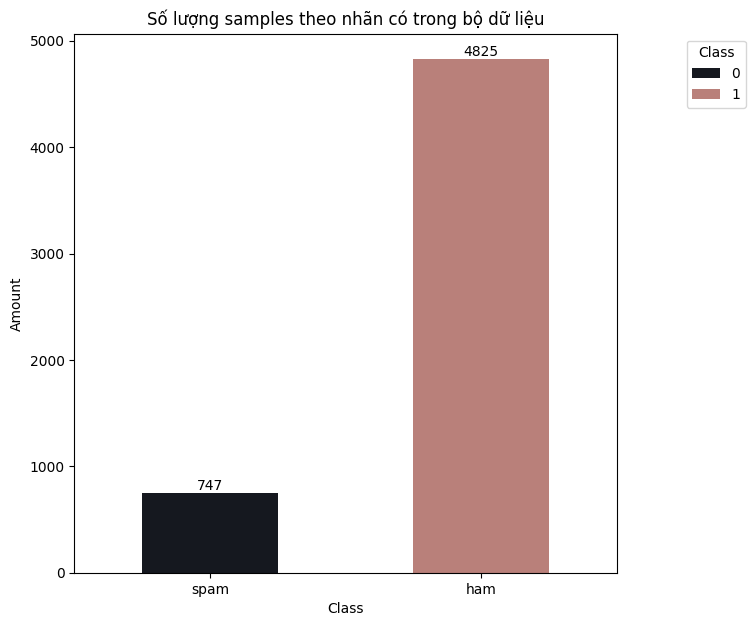

In [6]:
temp = df['v1'].value_counts(ascending=True)

plt.figure(figsize=(7, 7))
color_for_classes = ['#141820', '#C37870']
ax_temp = sns.barplot(x=temp.index, y=temp.values,  width=0.5, palette=color_for_classes)
legend_class = ['0', '1']
plt.legend(ax_temp.patches, legend_class, title='Class', bbox_to_anchor=(0.5, 0., 0.75, 1))
plt.title(f'Số lượng samples theo nhãn có trong bộ dữ liệu')
plt.xlabel('Class')
plt.ylabel('Amount')

for i, v in enumerate(temp.values):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=10)

# 3. Data Preprocessing

## 3.1. Data cleaning

In [7]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df.rename(columns={'v1': 'label', 'v2': 'text'}, inplace=True)
df = df[['text', 'label']]
df['label'] = df['label'].replace({'ham': 0, 'spam': 1})
df

,text,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will Ì_ b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


## 3.2. Missing values handling

In [8]:
df.isna().sum()

text     0
label    0
dtype: int64

## 3.3. Duplicated data handling

In [9]:
df.duplicated().sum()

403

In [10]:
df[df.duplicated() == True].value_counts().head(50)

text                                                                                                                                                                                                                                                                                                                                                                                                                                                          label
Sorry, I'll call later                                                                                                                                                                                                                                                                                                                                                                                                                                        0        29
I cant pick the phone right now. Pls send a message                                       

In [11]:
df[df.duplicated() & (df['label']  == 1)].value_counts().head(10)

text                                                                                                                                                                        label
Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed å£1000 cash or å£5000 prize!                       1        3
Loan for any purpose å£500 - å£75,000. Homeowners + Tenants welcome. Have you been previously refused? We can still help. Call Free 0800 1956669 or text back 'help'        1        2
Camera - You are awarded a SiPix Digital Camera! call 09061221066 fromm landline. Delivery within 28 days.                                                                  1        2
I don't know u and u don't know me. Send CHAT to 86688 now and let's find each other! Only 150p/Msg rcvd. HG/Suite342/2Lands/Row/W1J6HL LDN. 18 years or over.              1        2
FREE for 1st week! No1 Nokia tone 4 ur mob every week just txt NOKIA to 8007 Get txting an

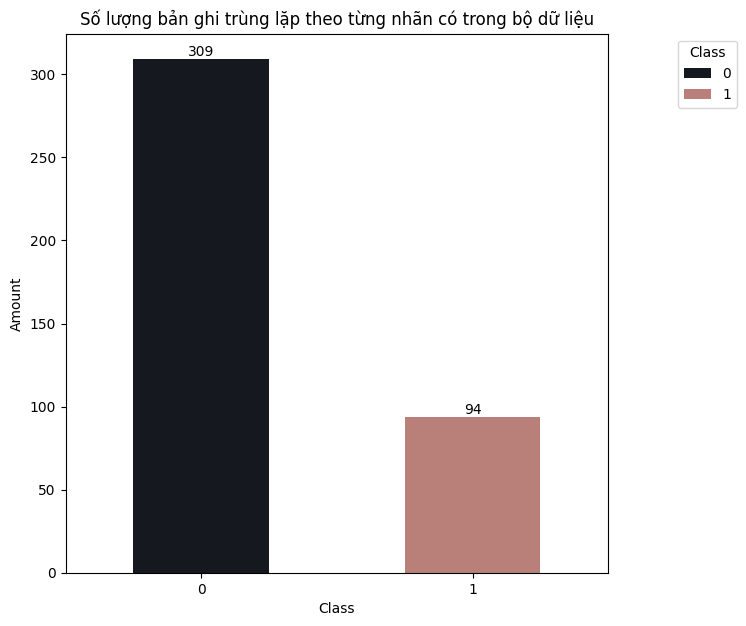

In [12]:
dup_df = df[df.duplicated() == True]
visualization_class_distribution(dup_df, 'Số lượng bản ghi trùng lặp theo từng nhãn có trong bộ dữ liệu', False)

In [13]:
df.drop_duplicates(keep='first', inplace=True)
df.duplicated().sum()

0

# 2. EDA (Explore Data Analysis)

In [14]:
print(df.sample(10))

                                                   text  label
2944  Hey babe, sorry i didn't get sooner. Gary can ...      0
4306  I guess it is useless calling u 4 something im...      0
4975  You are gorgeous! keep those pix cumming :) th...      0
16                           Oh k...i'm watching here:)      0
2306                         Aight that'll work, thanks      0
1891  Probably earlier than that if the station's wh...      0
4243  Aight, I'm chillin in a friend's room so text ...      0
3991  Dizzamn, aight I'll ask my suitemates when I g...      0
1513               Hows the champ just leaving glasgow!      0
4099                           I not at home now lei...      0


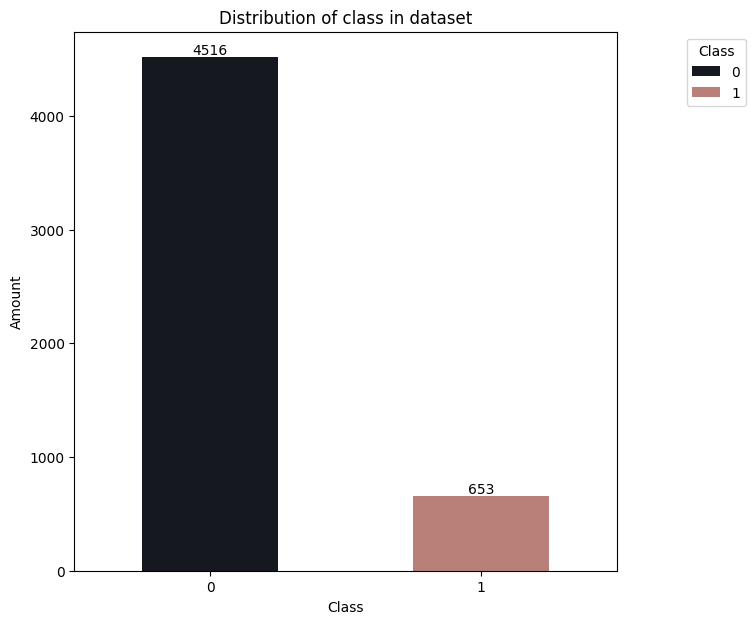

In [15]:
visualization_class_distribution(dataset=df, title='Distribution of class in dataset', order=False)

_--> This is imbalanced data_

In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
df['num_of_characters'] = df['text'].apply(len)
df

,text,label,num_of_characters
0,"Go until jurong point, crazy.. Available only ...",0,111
1,Ok lar... Joking wif u oni...,0,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,U dun say so early hor... U c already then say...,0,49
4,"Nah I don't think he goes to usf, he lives aro...",0,61
...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1,161
5568,Will Ì_ b going to esplanade fr home?,0,37
5569,"Pity, * was in mood for that. So...any other s...",0,57
5570,The guy did some bitching but I acted like i'd...,0,125


In [18]:
df['num_of_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df

,text,label,num_of_characters,num_of_words
0,"Go until jurong point, crazy.. Available only ...",0,111,24
1,Ok lar... Joking wif u oni...,0,29,8
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37
3,U dun say so early hor... U c already then say...,0,49,13
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15
...,...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1,161,35
5568,Will Ì_ b going to esplanade fr home?,0,37,9
5569,"Pity, * was in mood for that. So...any other s...",0,57,15
5570,The guy did some bitching but I acted like i'd...,0,125,27


In [19]:
df['num_of_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df

,text,label,num_of_characters,num_of_words,num_of_sentences
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,Ok lar... Joking wif u oni...,0,29,8,2
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,U dun say so early hor... U c already then say...,0,49,13,1
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1
...,...,...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1,161,35,4
5568,Will Ì_ b going to esplanade fr home?,0,37,9,1
5569,"Pity, * was in mood for that. So...any other s...",0,57,15,2
5570,The guy did some bitching but I acted like i'd...,0,125,27,1


In [20]:
df.describe()

,label,num_of_characters,num_of_words,num_of_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [21]:
df[df['label'] ==  0][['num_of_characters', 'num_of_words',	'num_of_sentences']].describe()

,num_of_characters,num_of_words,num_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [22]:
df[df['label'] ==  1][['num_of_characters', 'num_of_words',	'num_of_sentences']].describe()

,num_of_characters,num_of_words,num_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


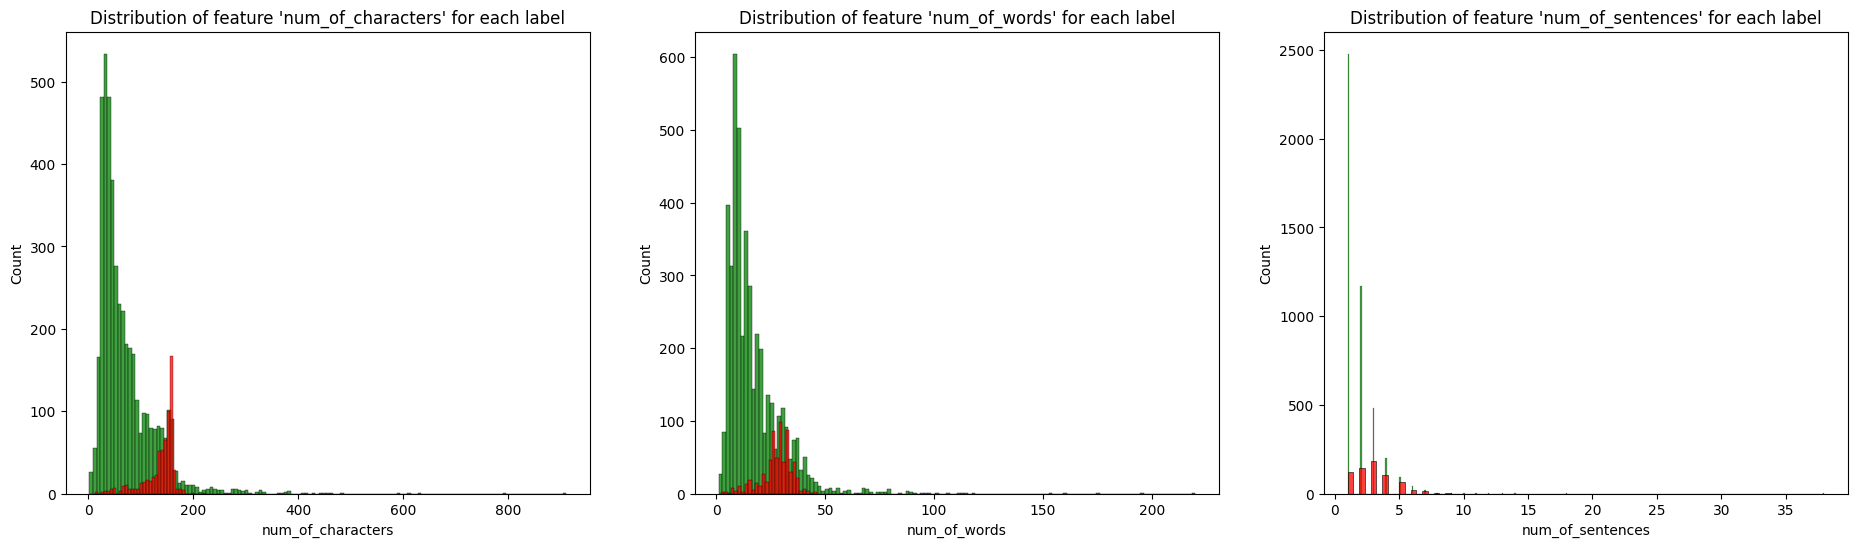

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(23, 6), sharex=False)

sns.histplot(df[df['label'] == 0]['num_of_characters'], color='green', ax=axes[0])
sns.histplot(df[df['label'] == 1 ]['num_of_characters'], color='red', ax=axes[0])
axes[0].set_title("Distribution of feature 'num_of_characters' for each label")

sns.histplot(df[df['label'] == 0]['num_of_words'], color='green', ax=axes[1])
sns.histplot(df[df['label'] == 1 ]['num_of_words'], color='red', ax=axes[1])
axes[1].set_title("Distribution of feature 'num_of_words' for each label")

sns.histplot(df[df['label'] == 0]['num_of_sentences'], color='green', ax=axes[2])
sns.histplot(df[df['label'] == 1 ]['num_of_sentences'], color='red', ax=axes[2])
axes[2].set_title("Distribution of feature 'num_of_sentences' for each label")

pass

c:\Users\ADMIN\anaconda3\envs\BasicML\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


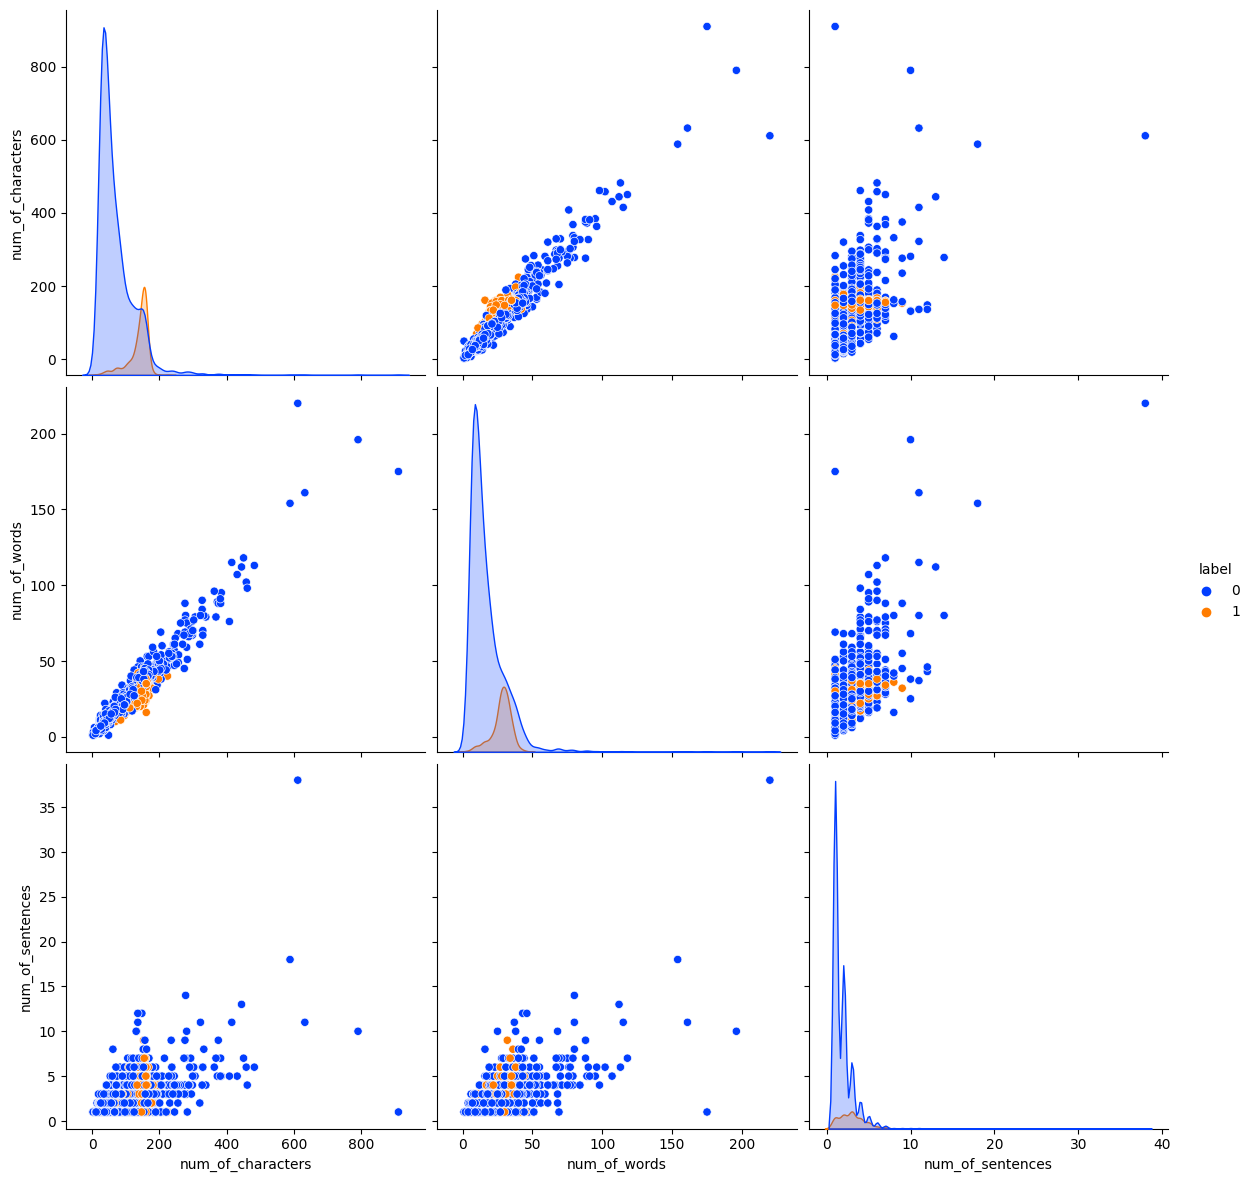

In [24]:
sns.pairplot(df, hue='label', palette='bright', height=4)
pass

<Axes: >

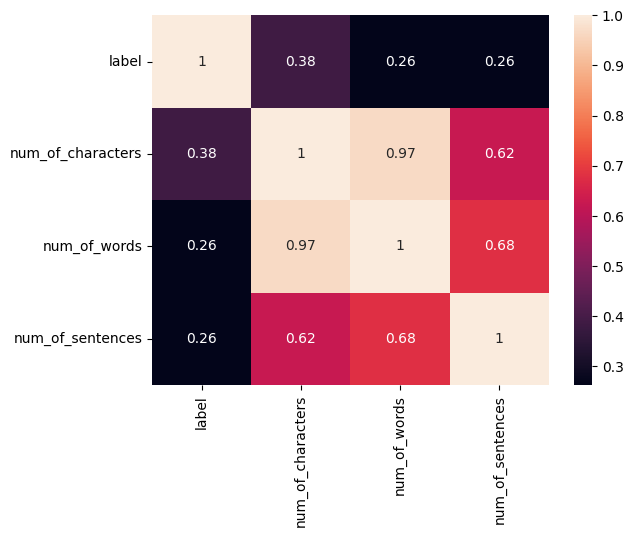

In [25]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

# 3. Data preprocessing

## 3.1. Text cleaning

In [26]:
lemma = WordNetLemmatizer()

In [27]:
def transform_text(content):
    text = content.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(lemma.lemmatize(i))
    return " ".join(y)

In [28]:
df['text'] = df['text'].apply(transform_text)
df

,text,label,num_of_characters,num_of_words,num_of_sentences
0,go jurong point crazy available bugis n great ...,0,111,24,2
1,ok lar joking wif u oni,0,29,8,2
2,free entry 2 wkly comp win fa cup final tkts 2...,1,155,37,2
3,u dun say early hor u c already say,0,49,13,1
4,nah think go usf life around though,0,61,15,1
...,...,...,...,...,...
5567,2nd time tried 2 contact u pound prize 2 claim...,1,161,35,4
5568,b going esplanade fr home,0,37,9,1
5569,pity mood suggestion,0,57,15,2
5570,guy bitching acted like interested buying some...,0,125,27,1


In [29]:
wc = WordCloud(width=1080, height=1080, min_font_size=8, background_color='white')

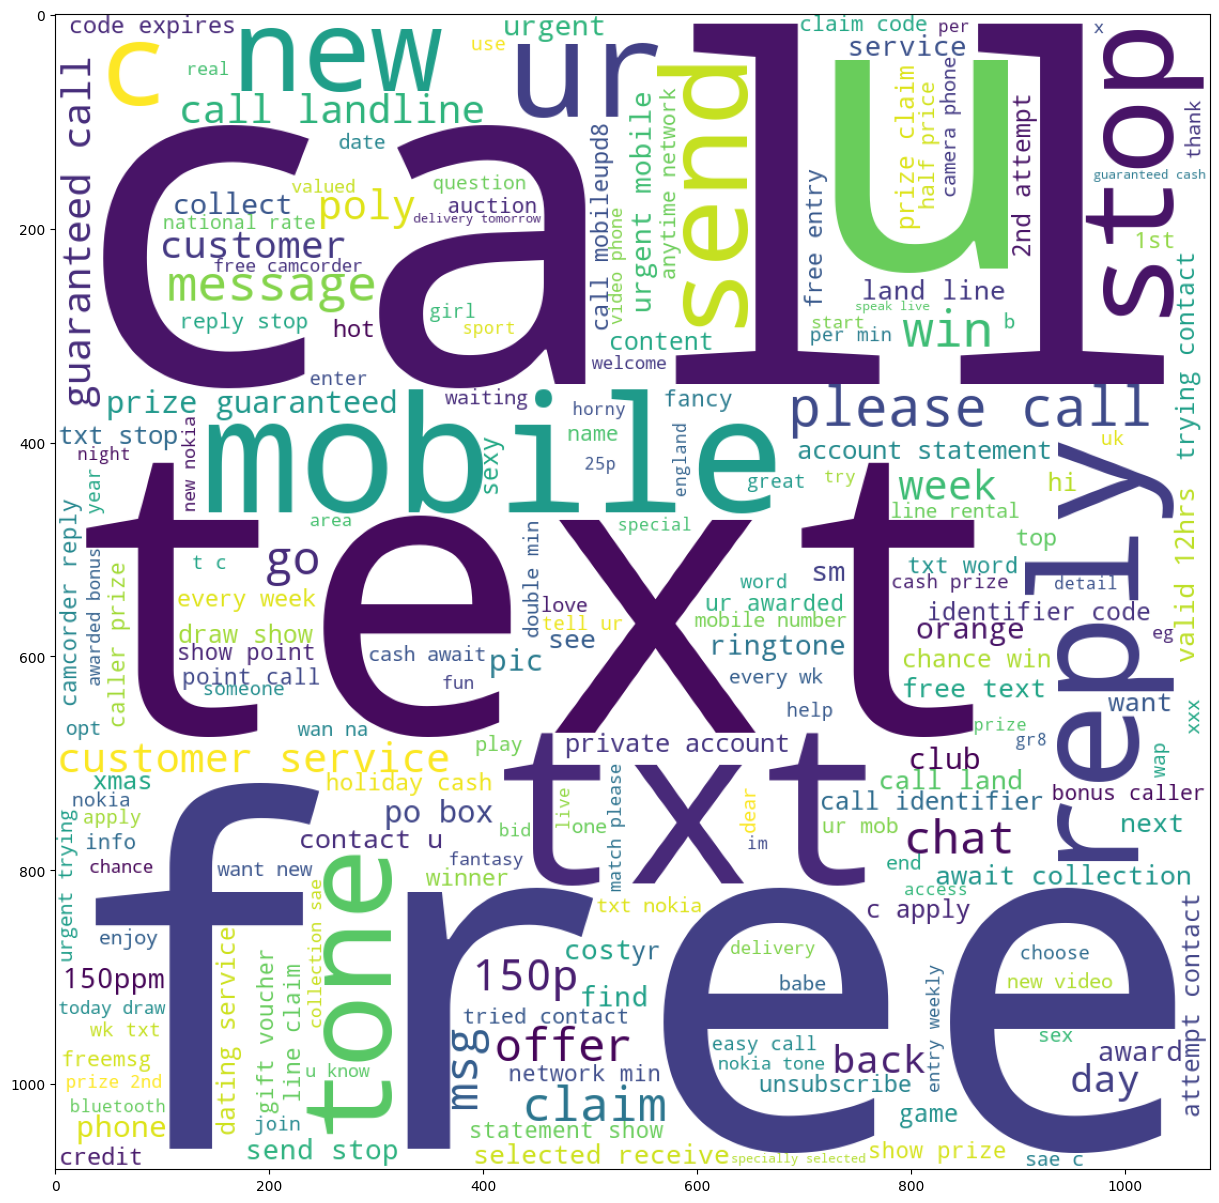

In [30]:
plt.figure(figsize=(15, 15))
spam_wc =  wc.generate(df[df['label']  == 1]['text'].str.cat(sep=' '))
plt.imshow(spam_wc)
pass

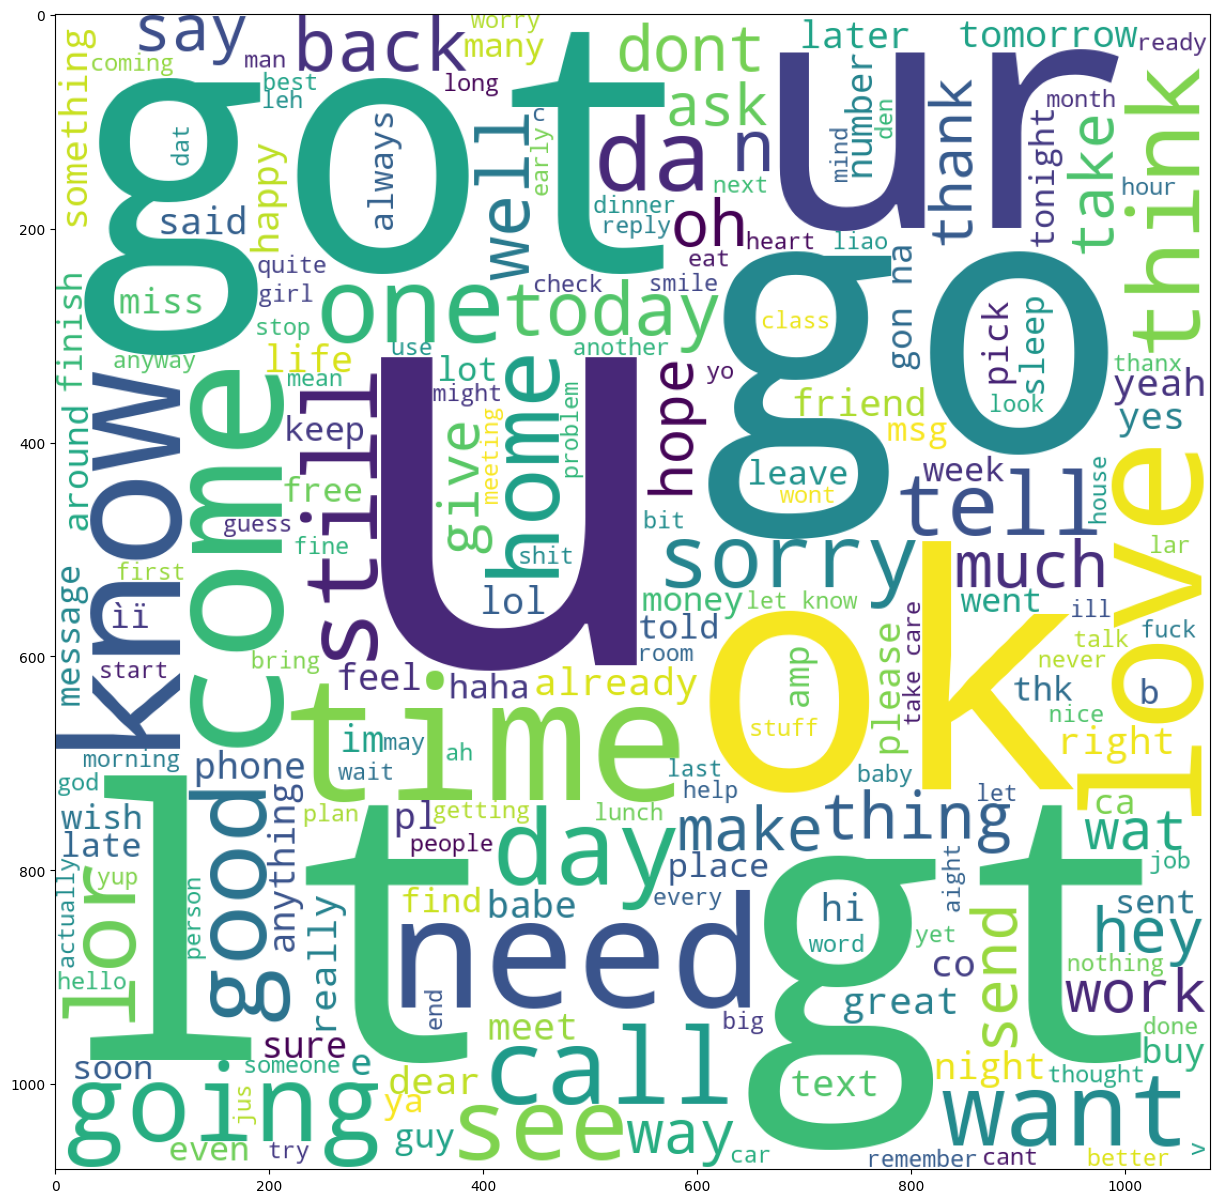

In [33]:
plt.figure(figsize=(15, 15))
unspam_wc =  wc.generate(df[df['label']  == 0]['text'].str.cat(sep=' '))
plt.imshow(unspam_wc)
pass

In [31]:
spam_corpus = []

for msg in df[df['label'] == 1]['text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [32]:
print(f'Len of array: {len(spam_corpus)}')

Len of array: 9939


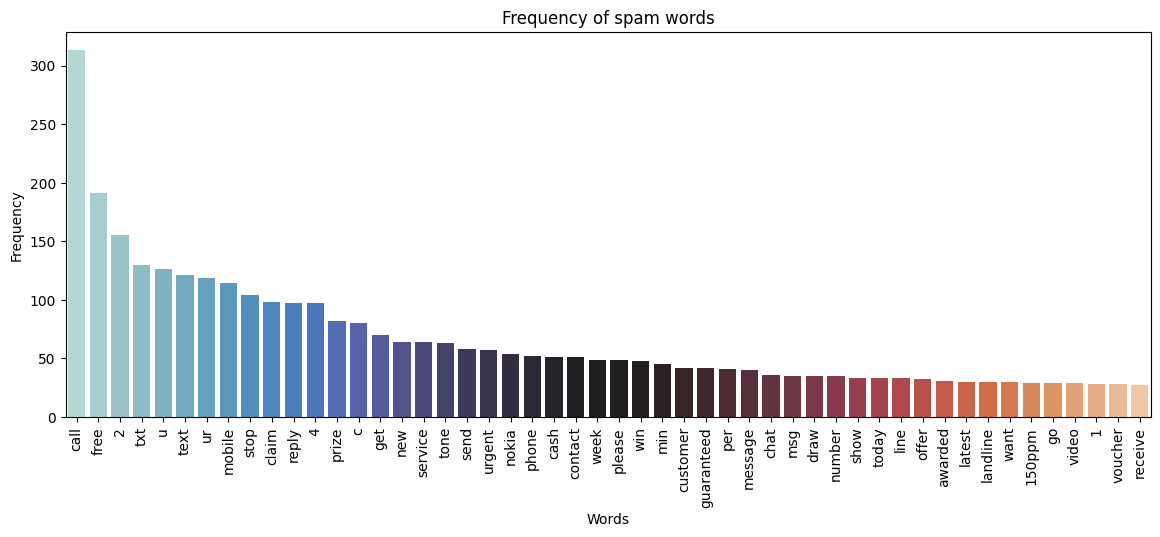

In [33]:
plt.figure(figsize=(14, 5))
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(50))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(50))[1], palette='icefire')
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Frequency of spam words')
pass

In [34]:
unspam_corpus = []

for msg in df[df['label'] == 0]['text'].tolist():
    for word in msg.split():
        unspam_corpus.append(word)

In [35]:
print(f'Len of array: {len(unspam_corpus)}')

Len of array: 35404


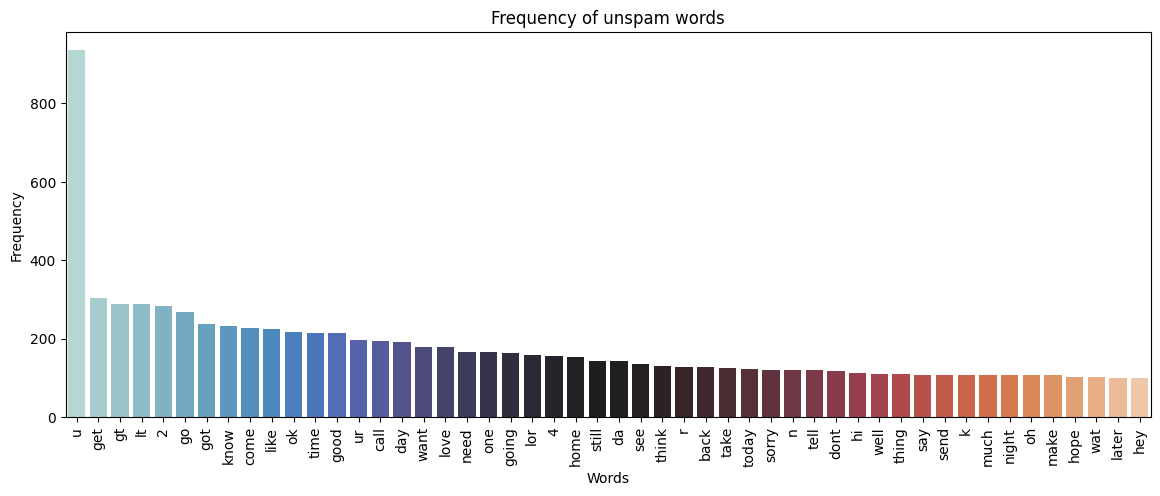

In [36]:
plt.figure(figsize=(14, 5))
sns.barplot(x=pd.DataFrame(Counter(unspam_corpus).most_common(50))[0], y=pd.DataFrame(Counter(unspam_corpus).most_common(50))[1], palette='icefire')
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Frequency of unspam words')
pass

In [40]:
df

,text,label,num_of_characters,num_of_words,num_of_sentences
0,go jurong point crazy available bugis n great ...,0,111,24,2
1,ok lar joking wif u oni,0,29,8,2
2,free entry 2 wkly comp win fa cup final tkts 2...,1,155,37,2
3,u dun say early hor u c already say,0,49,13,1
4,nah think go usf life around though,0,61,15,1
...,...,...,...,...,...
5567,2nd time tried 2 contact u pound prize 2 claim...,1,161,35,4
5568,b going esplanade fr home,0,37,9,1
5569,pity mood suggestion,0,57,15,2
5570,guy bitching acted like interested buying some...,0,125,27,1


In [41]:
df.isna().sum()

text                 0
label                0
num_of_characters    0
num_of_words         0
num_of_sentences     0
dtype: int64

In [42]:
df.duplicated().sum()

4

In [43]:
df[df.duplicated()]

,text,label,num_of_characters,num_of_words,num_of_sentences
1395,thats cool gentleman treat dignity respect,0,73,16,2
3493,contacted dating service someone know find cal...,1,140,28,3
3696,winner specially selected receive cash award s...,1,159,30,3
4618,sorry call later meeting,0,34,9,1


In [44]:
df = df[['text', 'num_of_characters', 'num_of_words', 'num_of_sentences', 'label']]
df

,text,num_of_characters,num_of_words,num_of_sentences,label
0,go jurong point crazy available bugis n great ...,111,24,2,0
1,ok lar joking wif u oni,29,8,2,0
2,free entry 2 wkly comp win fa cup final tkts 2...,155,37,2,1
3,u dun say early hor u c already say,49,13,1,0
4,nah think go usf life around though,61,15,1,0
...,...,...,...,...,...
5567,2nd time tried 2 contact u pound prize 2 claim...,161,35,4,1
5568,b going esplanade fr home,37,9,1,0
5569,pity mood suggestion,57,15,2,0
5570,guy bitching acted like interested buying some...,125,27,1,0


In [45]:
df['text'].value_counts().to_frame()

,count
text,
,9
ok,5
sorry call later meeting,3
u,3
come,3
...,...
arun u transfr amt,1
yes sura sun tv lol,1
know god created gap finger one made come amp fill gap holding hand love,1


In [46]:
df[df['text'] == '']

,text,num_of_characters,num_of_words,num_of_sentences,label
252,,27,8,1,0
959,,7,2,1,0
2805,,10,4,1,0
3092,,49,1,1,0
3374,,3,2,1,0
4291,,5,1,1,0
4573,,24,7,1,0
4822,,7,6,1,0
5268,,3,1,1,0


In [47]:
df = df[~(df['text'] == '')]
df['text'].value_counts().to_frame().head(10)

,count
text,
ok,5
sorry call later meeting,3
late,3
come,3
u,3
camera awarded sipix digital camera call 09061221066 fromm landline delivery within 28 day,2
ur currently 500 pound maximize ur send go 86688 cc 08718720201,2
sir waiting mail,2
eerie nokia tone 4u rply tone title 8007 eg tone dracula 8007 title ghost addamsfa munsters exorcist twilight pobox36504w45wq 150p,2


In [48]:
df = df.drop_duplicates(subset='text', keep='first')
df['text'].value_counts().to_frame().head(10)

,count
text,
go jurong point crazy available bugis n great world la e buffet cine got amore wat,1
stop club tone replying see html term club tone cost mfl,1
hmm ill think ok forgiven,1
hey babe friend cancel still visit,1
carlos say pick later yeah set,1
wamma get laid want real doggin location sent direct mobile join uk largest dogging network txt dog 69696 nyt ec2a 3lp,1
thought see,1
sorry left phone upstairs ok might hectic would bird one fell swoop date,1
house e sky quite dark liao raining got excuse 2 run already rite hee,1


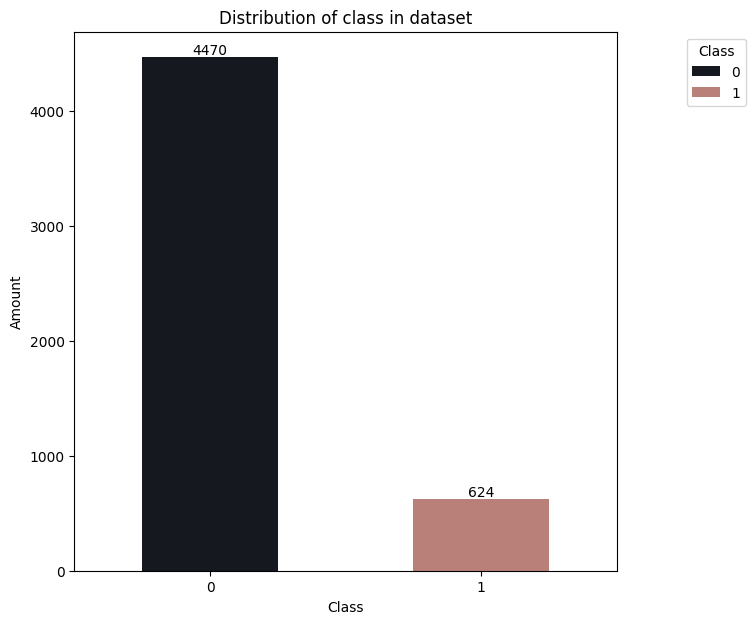

In [49]:
visualization_class_distribution(dataset=df, title='Distribution of class in dataset', order=False)

In [55]:
df.to_csv('./Dataset/clean.csv', index=None)

In [51]:
df = pd.read_csv('./Dataset/clean.csv')

In [62]:
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [57]:
X_text = tfidf.fit_transform(df['text'])
len(tfidf.get_feature_names_out())

7490

In [58]:
X_numeric = df[['num_of_characters', 'num_of_words', 'num_of_sentences']].values

In [64]:
X = hstack([X_text, X_numeric])

In [68]:
X

<5094x7493 sparse matrix of type '<class 'numpy.float64'>'
	with 55440 stored elements in COOrdinate format>

In [65]:
y = df['label']

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [76]:
X_train, X_text, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [78]:
y_pred = log_reg.predict(X_text)

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       903
           1       0.90      0.78      0.83       116

    accuracy                           0.96      1019
   macro avg       0.94      0.88      0.91      1019
weighted avg       0.96      0.96      0.96      1019

